In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:

df = pd.read_excel('airlines_delay.xlsx',sheet_name='data')



In [4]:
df

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313,1296,141,DL,ATL,HOU,1,0
1,6948,360,146,OO,COS,ORD,4,0
2,1247,1170,143,B6,BOS,CLT,3,0
3,31,1410,344,US,OGG,PHX,6,0
4,563,692,98,FL,BMI,ATL,4,0
...,...,...,...,...,...,...,...,...
539377,6973,530,72,OO,GEG,SEA,5,1
539378,1264,560,115,WN,LAS,DEN,4,1
539379,5209,827,74,EV,CAE,ATL,2,1
539380,607,715,65,WN,BWI,BUF,4,1


In [5]:
df['Class'].value_counts()

0    299118
1    240264
Name: Class, dtype: int64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Flight       539382 non-null  int64 
 1   Time         539382 non-null  int64 
 2   Length       539382 non-null  int64 
 3   Airline      539382 non-null  object
 4   AirportFrom  539382 non-null  object
 5   AirportTo    539382 non-null  object
 6   DayOfWeek    539382 non-null  int64 
 7   Class        539382 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.9+ MB


In [219]:
df.corr()

,Flight,Time,Length,DayOfWeek,Class
Flight,1.000000,-0.005750,-0.341481,0.000416,-0.046174
Time,-0.005750,1.000000,-0.020610,0.001272,0.150457
Length,-0.341481,-0.020610,1.000000,0.013398,0.040488
DayOfWeek,0.000416,0.001272,0.013398,1.000000,-0.026198
Class,-0.046174,0.150457,0.040488,-0.026198,1.000000


<AxesSubplot:xlabel='Class', ylabel='Time'>

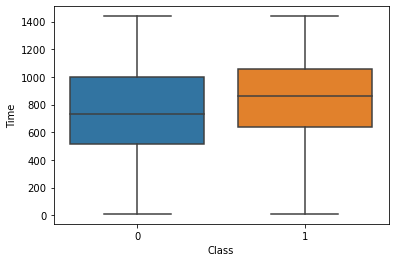

In [220]:
sns.boxplot(data=df,x='Class',y='Time')

<AxesSubplot:xlabel='Time', ylabel='Count'>

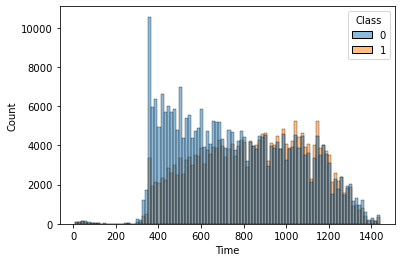

In [221]:
sns.histplot(data=df,x='Time',bins=100,hue='Class')

In [222]:
#sns.pairplot(df,hue='Class')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Flight       539382 non-null  int64 
 1   Time         539382 non-null  int64 
 2   Length       539382 non-null  int64 
 3   Airline      539382 non-null  object
 4   AirportFrom  539382 non-null  object
 5   AirportTo    539382 non-null  object
 6   DayOfWeek    539382 non-null  int64 
 7   Class        539382 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.9+ MB


In [224]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36604
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [225]:
df['AirportFrom'].value_counts()

ATL    34449
ORD    24822
DFW    22153
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

In [226]:
mean_from_encoding = df.groupby('AirportFrom')['Class'].mean()

In [227]:
df['AirportFrom_Encoded'] = df['AirportFrom'].map(mean_from_encoding)

In [228]:
mean_to_encoding = df.groupby('AirportTo')['Class'].mean()

In [229]:
df['AirportTo_Encoded'] = df['AirportTo'].map(mean_to_encoding)

In [230]:
from sklearn.preprocessing import LabelEncoder

In [231]:
airline_dummies=pd.get_dummies(df['Airline'],drop_first=True)

In [232]:
df=pd.concat([df,airline_dummies],axis=1)

In [233]:
df.drop(['Airline','AirportFrom','AirportTo'],axis=1,inplace=True)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Flight               539382 non-null  int64  
 1   Time                 539382 non-null  int64  
 2   Length               539382 non-null  int64  
 3   DayOfWeek            539382 non-null  int64  
 4   Class                539382 non-null  int64  
 5   AirportFrom_Encoded  539382 non-null  float64
 6   AirportTo_Encoded    539382 non-null  float64
 7   AA                   539382 non-null  uint8  
 8   AS                   539382 non-null  uint8  
 9   B6                   539382 non-null  uint8  
 10  CO                   539382 non-null  uint8  
 11  DL                   539382 non-null  uint8  
 12  EV                   539382 non-null  uint8  
 13  F9                   539382 non-null  uint8  
 14  FL                   539382 non-null  uint8  
 15  HA               

In [235]:
df.corr()['Class']

Flight                -0.046174
Time                   0.150457
Length                 0.040488
DayOfWeek             -0.026198
Class                  1.000000
AirportFrom_Encoded    0.179937
AirportTo_Encoded      0.167566
AA                    -0.034858
AS                    -0.031483
B6                     0.008099
CO                     0.049045
DL                     0.003614
EV                    -0.020348
F9                     0.000796
FL                    -0.058125
HA                    -0.025762
MQ                    -0.052844
OH                    -0.052393
OO                     0.004809
UA                    -0.056807
US                    -0.057577
WN                     0.233369
XE                    -0.033111
YV                    -0.065845
Name: Class, dtype: float64

In [236]:
#print(df['AirportTo'].value_counts().to_string(max_rows=None))


In [237]:
from sklearn.model_selection import train_test_split

In [238]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
rfc=RandomForestClassifier(n_estimators=100)

In [240]:
#X=df.drop(['Class','DayOfWeek','Flight','Length','AA','AS','B6','DL','EV','F9','FL','HA','MQ','OH','OO','UA','US','XE','YV'],axis=1)

In [241]:
X=df[['Time','AirportFrom_Encoded','AirportTo_Encoded','WN']]

In [242]:
y=df['Class']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [244]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [245]:
rfc_pred=rfc.predict(X_test)

In [246]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [247]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print(roc_auc_score(y_test,rfc_pred))

[[66105 23319]
 [32488 39903]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70     89424
           1       0.63      0.55      0.59     72391

    accuracy                           0.66    161815
   macro avg       0.65      0.65      0.65    161815
weighted avg       0.65      0.66      0.65    161815

0.6452230044688655
